In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid")

df = pd.read_csv("sample_data/ai_job_dataset.csv")

df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


Check early information

In [46]:
df.info()
df.describe()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

np.int64(0)

change data types

In [47]:
categorical_cols = ["salary_currency", "experience_level", "employment_type", "company_location", "company_size", "employee_residence", "education_required", "industry"]

for category_col in categorical_cols:
    df[category_col] = df[category_col].astype("category")

date_cols = ["posting_date", "application_deadline"]

for date_col in date_cols:
    df[date_col] = pd.to_datetime(df[date_col])

df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


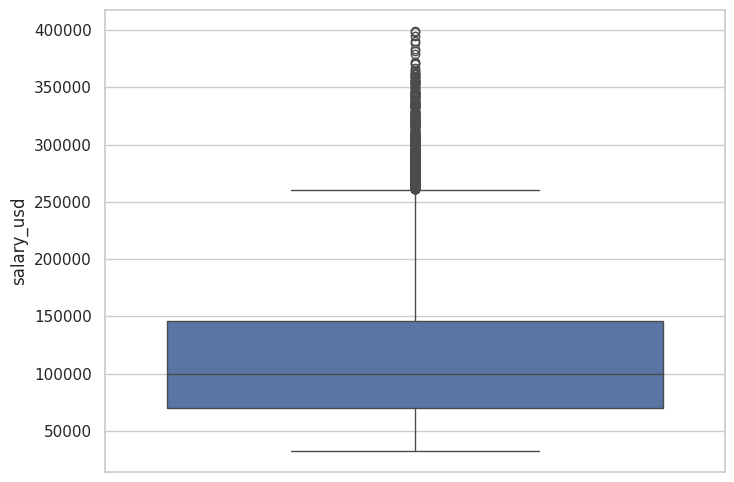

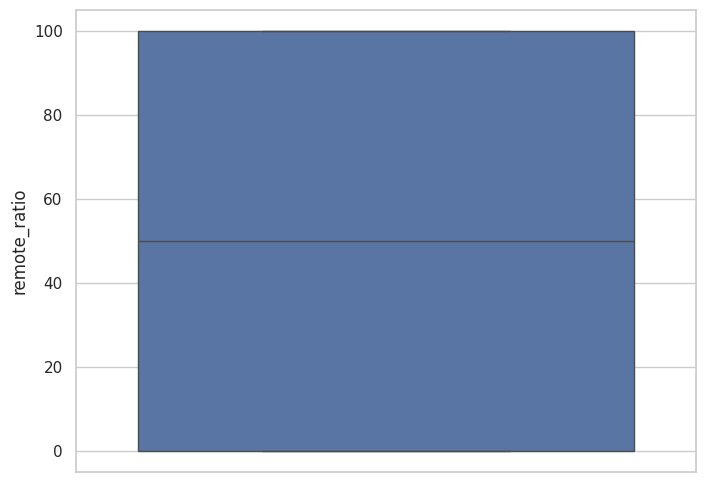

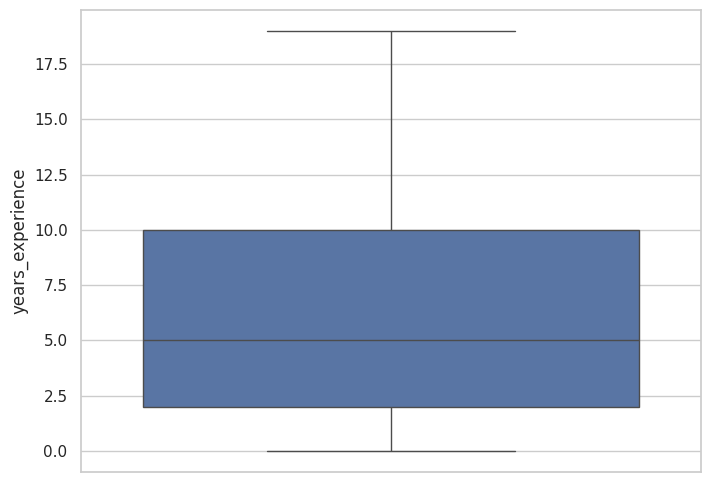

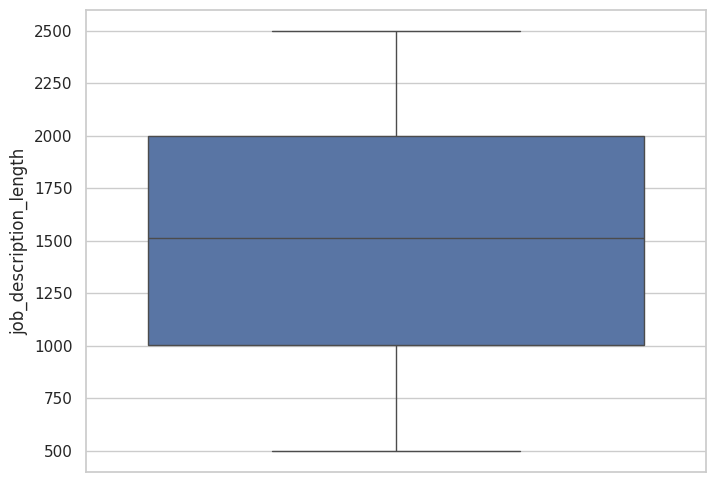

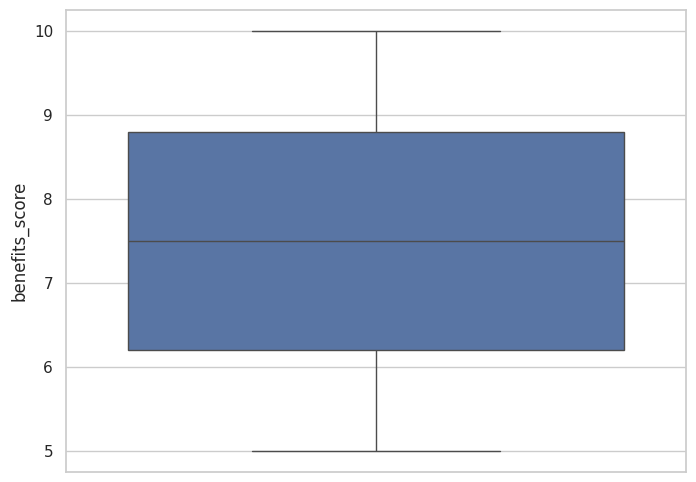

In [48]:
numeric_cols = ["salary_usd", "remote_ratio", "years_experience", "job_description_length", "benefits_score"]

for numeric_col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[numeric_col])

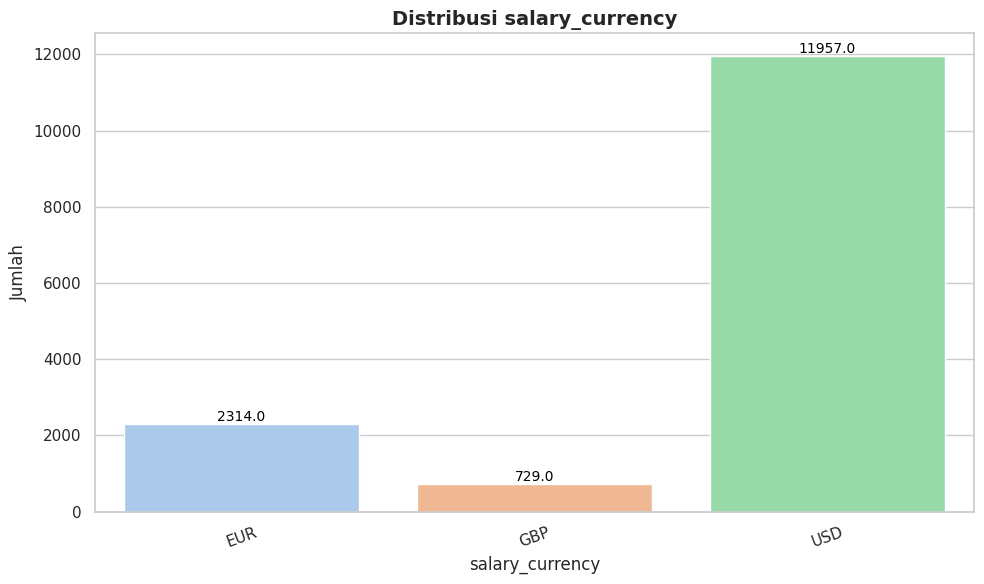

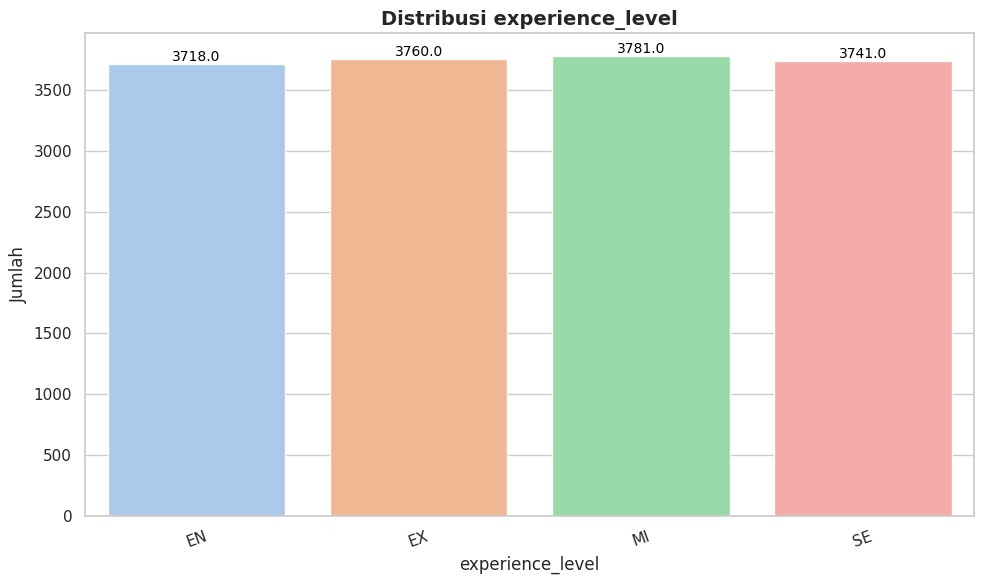

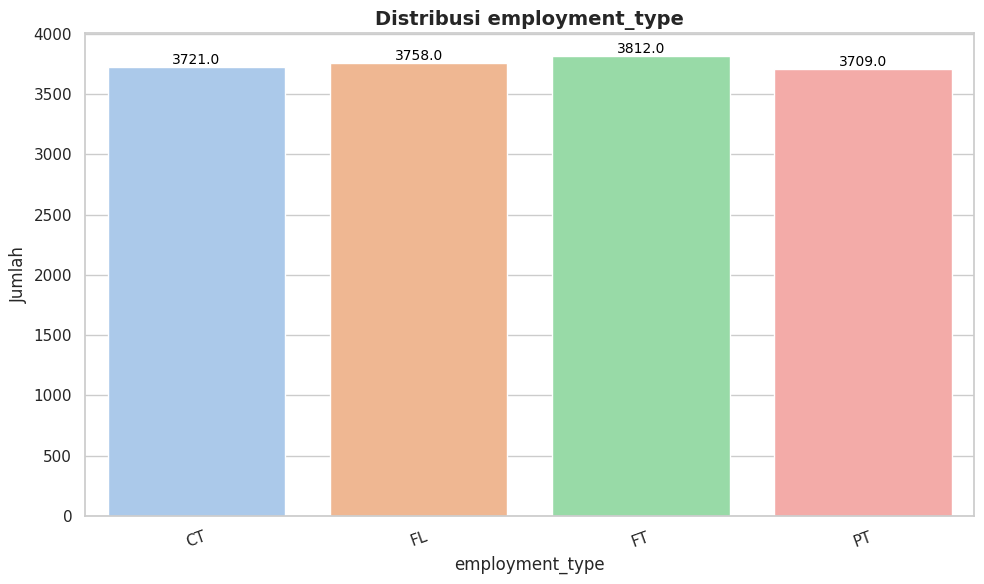

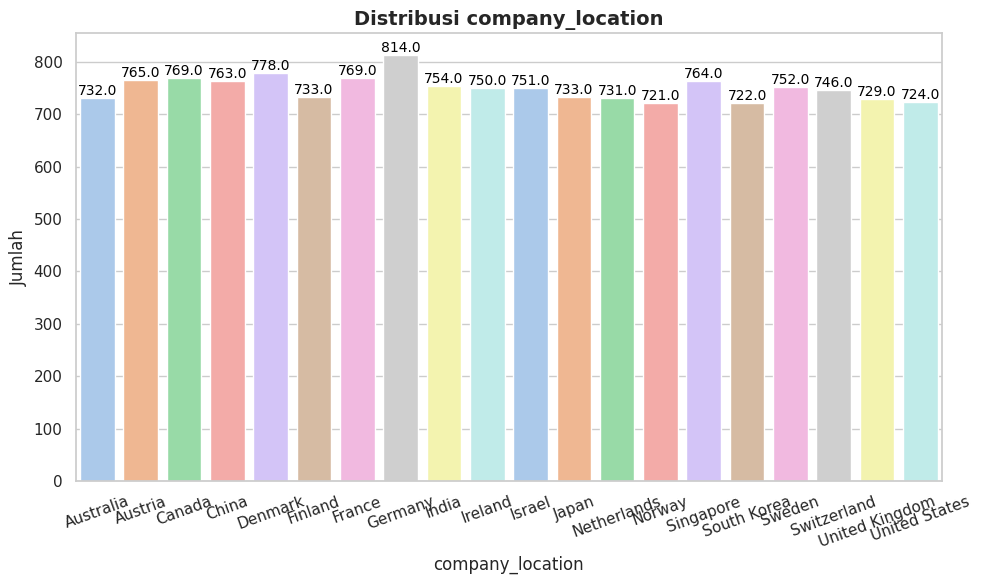

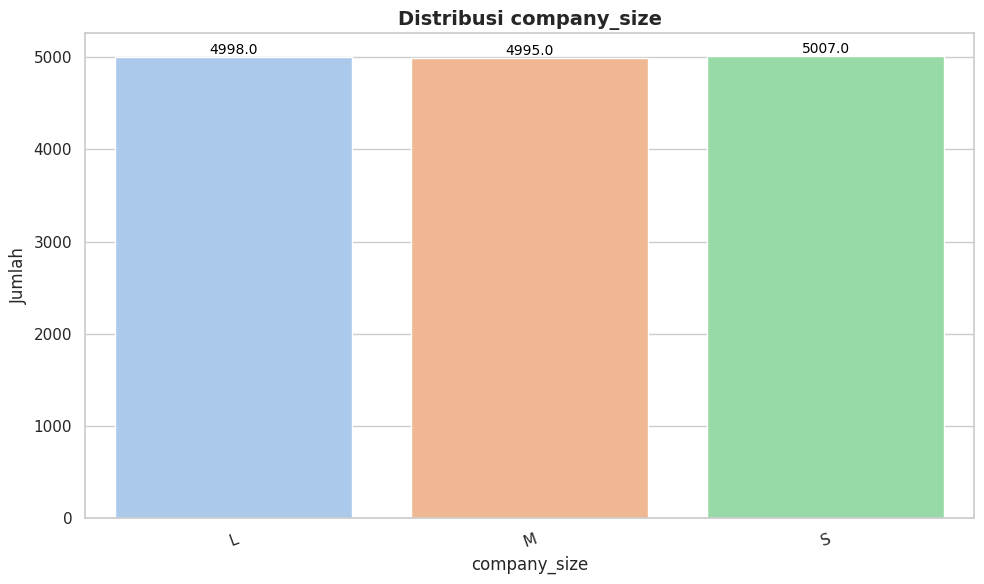

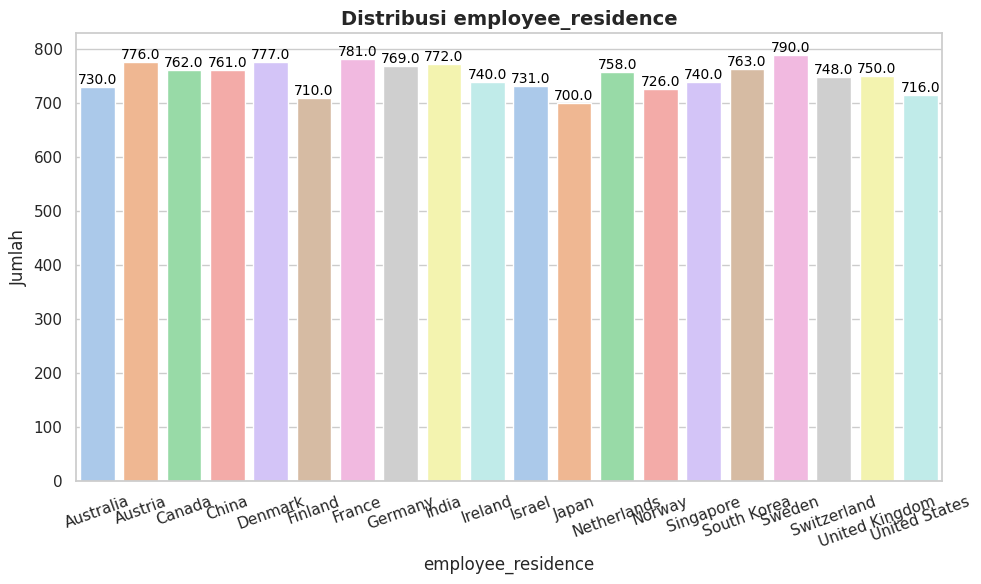

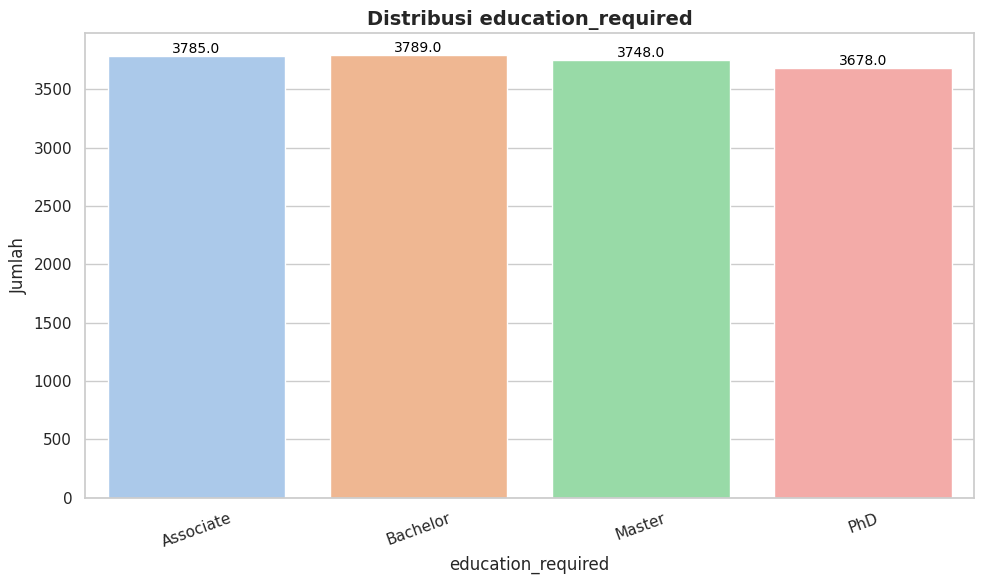

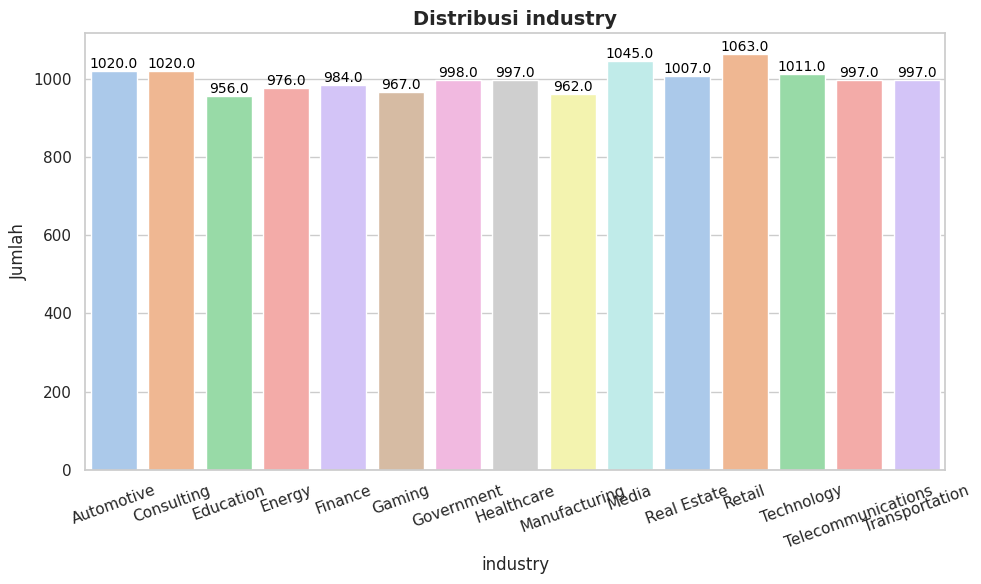

In [49]:
for category_col in categorical_cols:
    plt.figure(figsize=(10, 6))

    ax = sns.countplot(data=df, x=category_col, palette="pastel", hue=category_col)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Distribusi {category_col}', fontsize=14, fontweight='bold')
    plt.xlabel(category_col, fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)


    plt.xticks(rotation=20)

    plt.tight_layout()
    plt.show()

#bivariate analysis

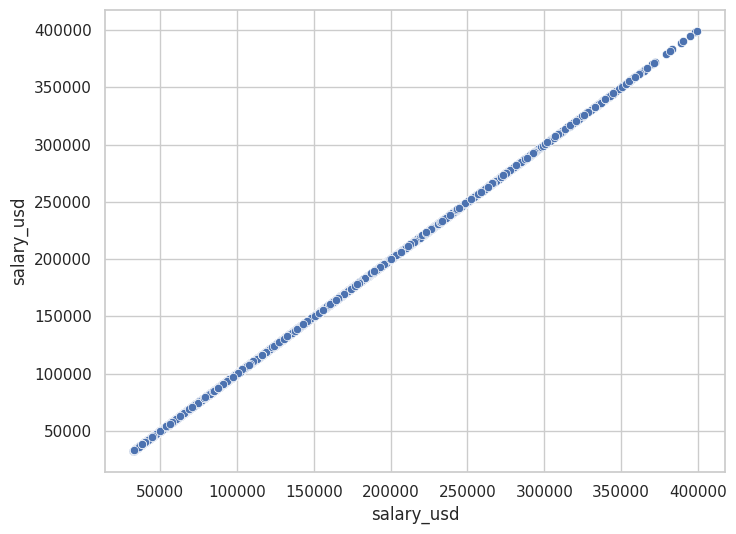

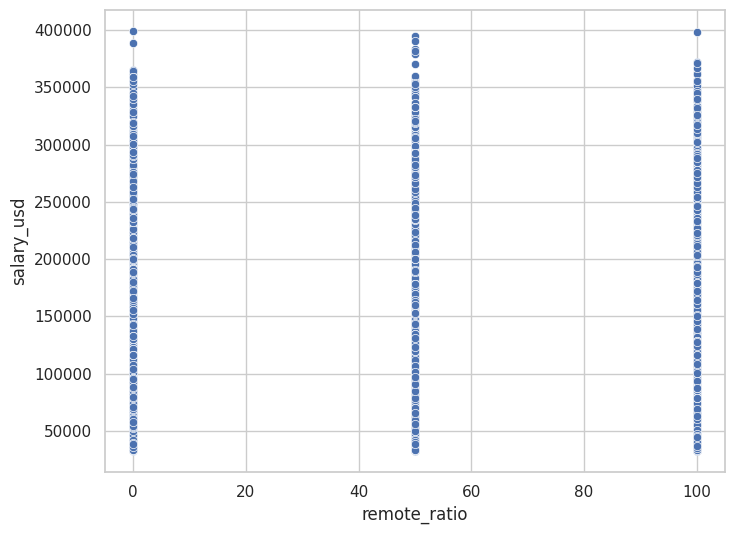

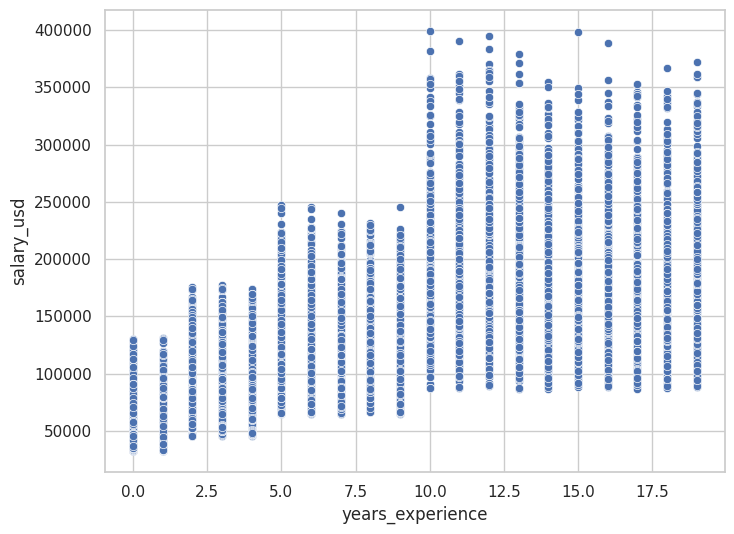

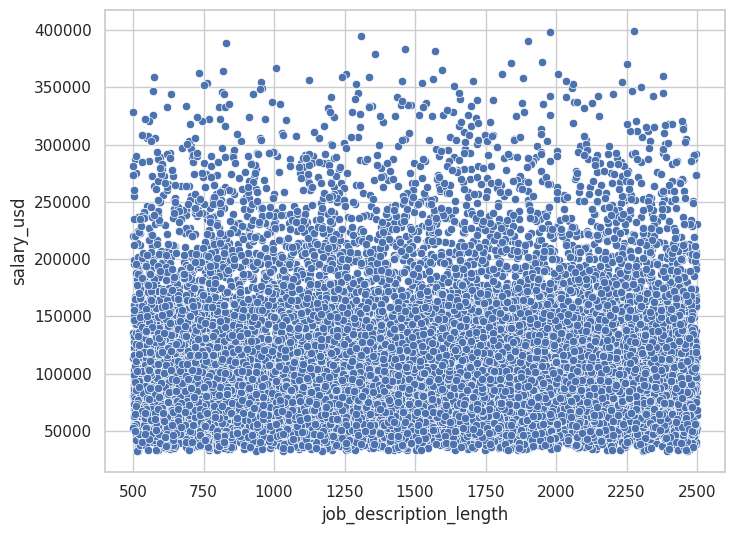

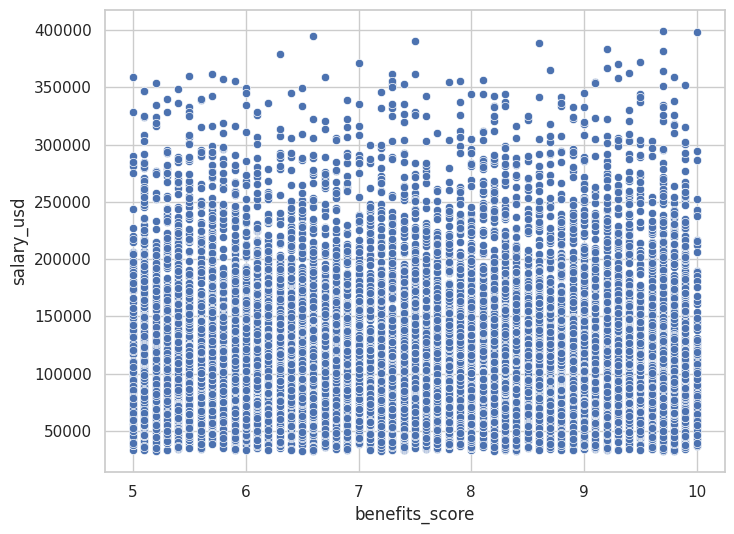

In [50]:
# check pattenrn of numeric columns and salary_usd
for numeric_col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=numeric_col, y="salary_usd")

In [51]:
# # check pattenrn of categorical columns and salary_usd

# for category_col in categorical_cols:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(data=df, x=category_col, y="salary_usd")
#     plt.title(f'Distribusi {category_col} terhadap Salary USD', fontsize=14, fontweight='bold')
#     plt.xlabel(category_col, fontsize=12)
#     plt.ylabel('Salary USD', fontsize=12)
#     plt.xticks(rotation=20)
#     plt.tight_layout()
#     plt.show()

Multivariate Analysis

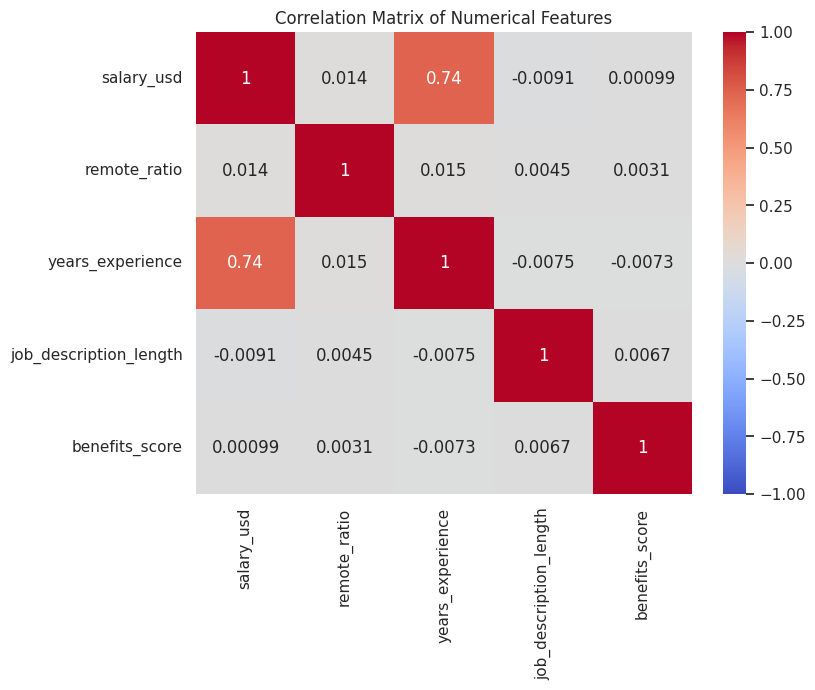

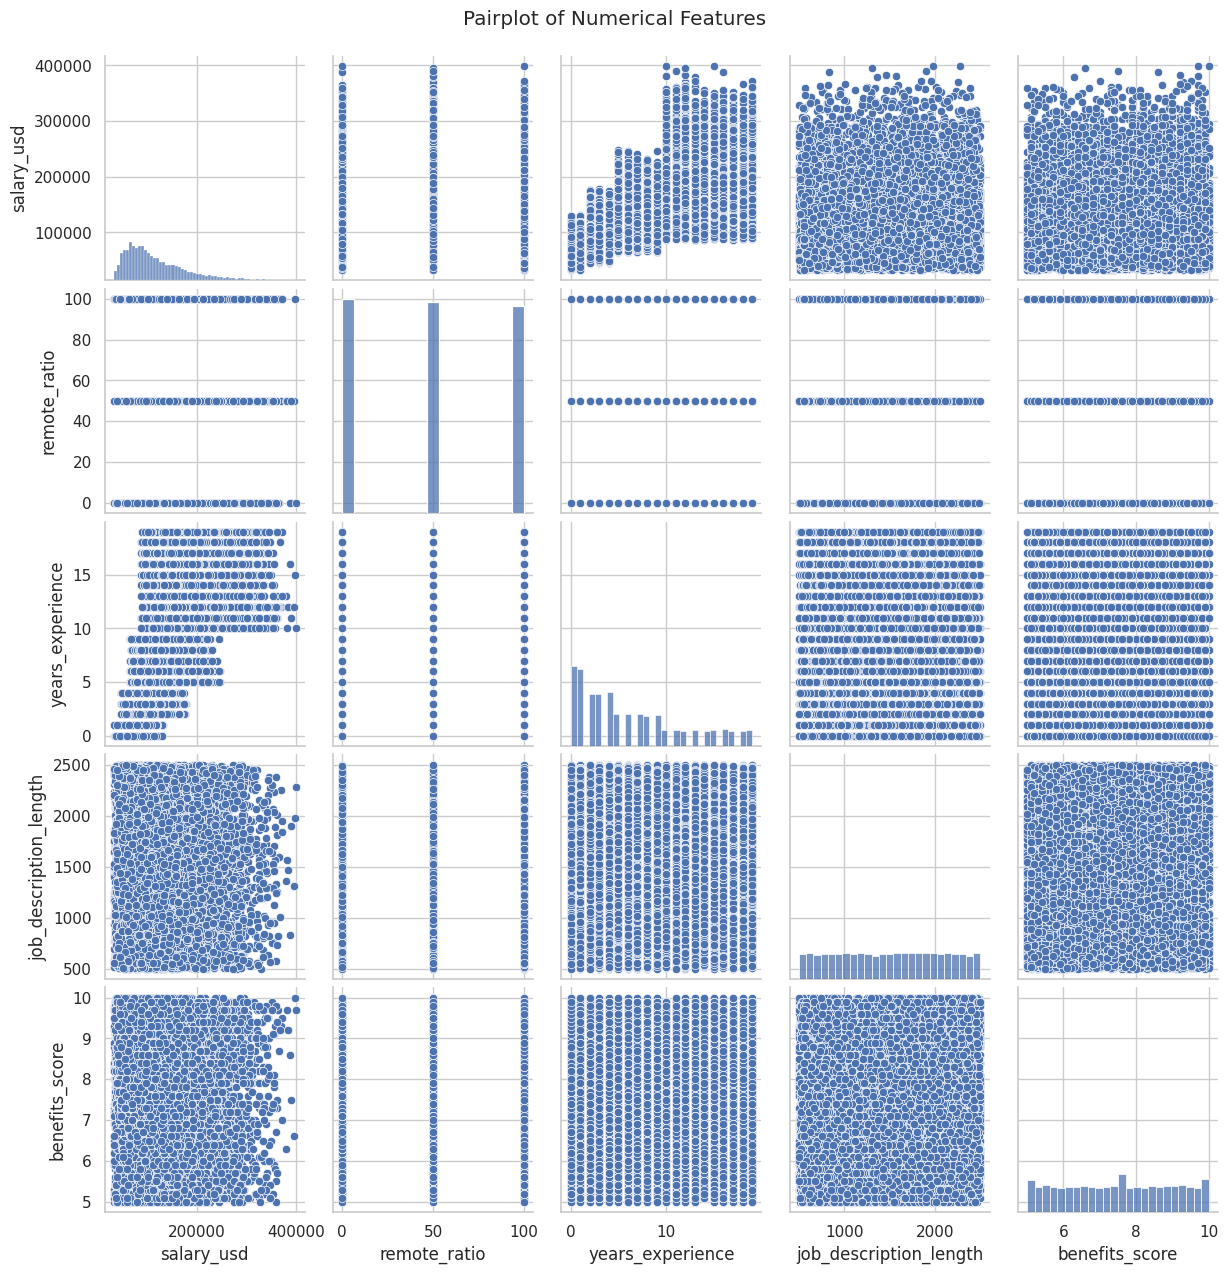

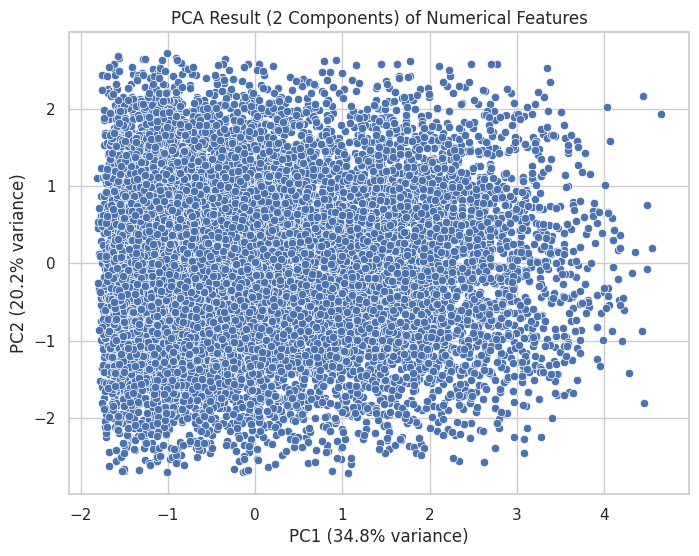

In [52]:
num_cols = [
    'salary_usd',
    'remote_ratio',
    'years_experience',
    'job_description_length',
    'benefits_score'
]

# 1. Korelasi antar fitur numerik
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Pairplot scatter matrix
sns.pairplot(df[num_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# 3. PCA untuk reduksi dimensi
# Standarisasi df dulu
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df[num_cols].dropna())

pca = PCA(n_components=2)
pca_result = pca.fit_transform(num_scaled)

# Buat dataframe hasil PCA
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)  # <-- perbaikan di sini
plt.title('PCA Result (2 Components) of Numerical Features')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.show()


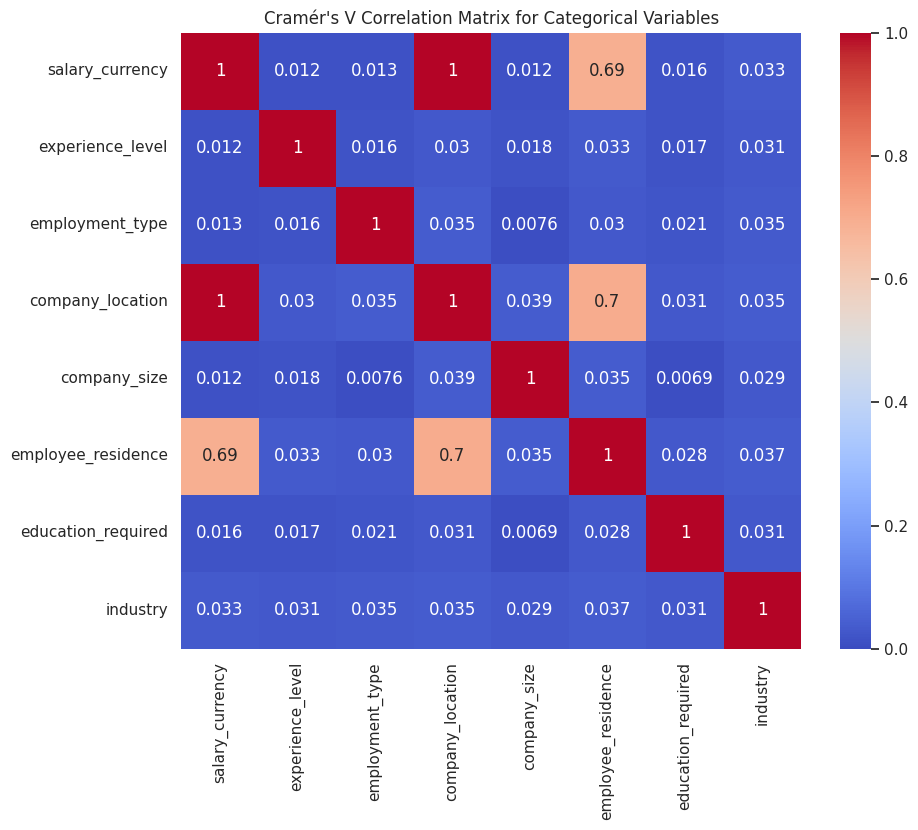

In [53]:

# Fungsi hitung Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

# Dataset contoh: ganti dengan dataset asli kamu
# data = pd.read_csv('your_dataset.csv')

# Misal ini subset kategori dari dataset kamu:
category_cols = [
    'salary_currency', 'experience_level', 'employment_type', 'company_location',
    'company_size', 'employee_residence', 'education_required', 'industry'
]

# Hitung matrix Cramér's V
cramers_results = pd.DataFrame(index=category_cols, columns=category_cols)

for col1 in category_cols:
    for col2 in category_cols:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_results = cramers_results.astype(float)

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()

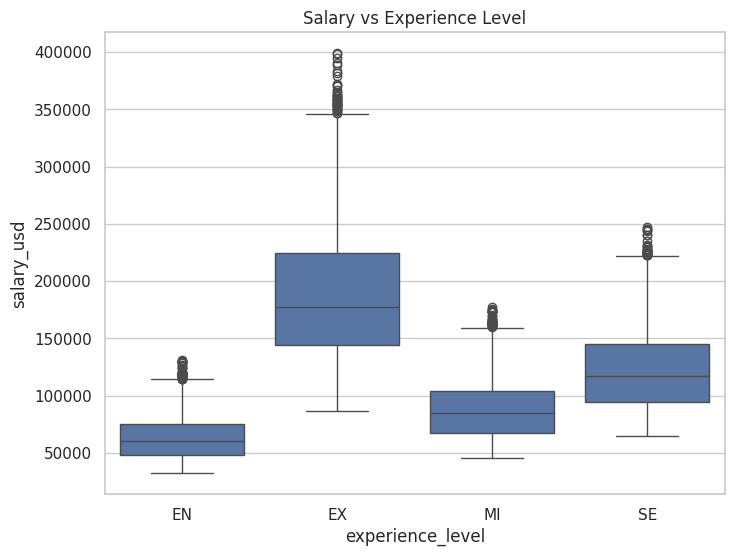

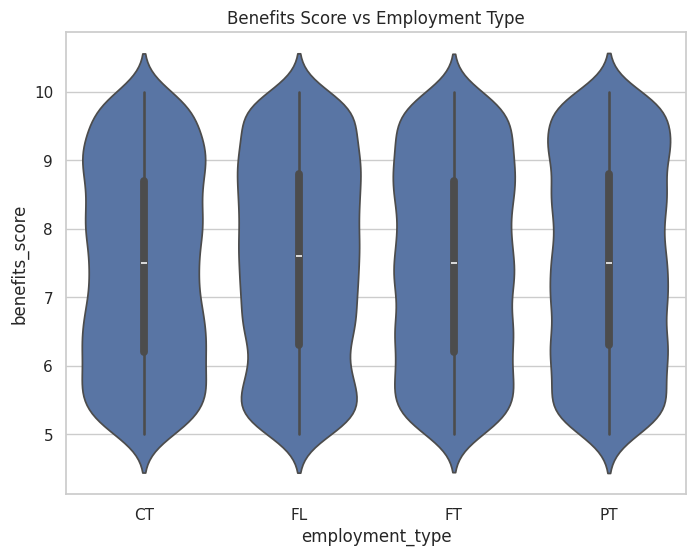

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Salary berdasarkan Experience Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='experience_level', y='salary_usd', data=df)
plt.title('Salary vs Experience Level')
plt.show()

# Violin Plot: Benefits Score berdasarkan Employment Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='employment_type', y='benefits_score', data=df)
plt.title('Benefits Score vs Employment Type')
plt.show()

# Swarmplot: Salary berdasarkan Company Size
plt.figure(figsize=(8, 6))
sns.swarmplot(x='company_size', y='salary_usd', data=df)
plt.title('Salary vs Company Size')
plt.show()

# FacetGrid: Distribusi Salary berdasarkan Experience Level & Employment Type
g = sns.FacetGrid(df, col="experience_level", row="employment_type", margin_titles=True)
g.map_dataframe(sns.histplot, x="salary_usd", bins=20)
g.fig.suptitle("Salary Distribution by Experience Level and Employment Type", y=1.02)
plt.show()

df.head()


Preprocessing

In [ ]:
# Feature Selection

df.drop(["job_id","employee_residence", "salary_currency", "company_name", "job_title", "posting_date", "application_deadline", "required_skills"], axis=1, inplace=True )
df.head(20)

In [ ]:
# One Hot Encode

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_data = ohe.fit_transform(df[["employment_type", "company_location", "industry"]])

encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(["employment_type", "company_location", "industry"]))

df = pd.concat([df.drop(["employment_type", "company_location", "industry"], axis=1), encoded_df], axis=1)

df['salary_usd'] = np.log1p(df['salary_usd'])  # pakai log(1 + x) agar data 0 tetap aman

df.head()




Ordinal encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[
    ['EN', 'MI', 'SE', 'EX'],
    ['S', 'M', 'L'],
    ['Associate', 'Bachelor', 'Master', 'PhD']
])


encoded_data = encoder.fit_transform(df[["experience_level", "company_size", "education_required"]])

print(encoded_data)

encoded_df = pd.DataFrame(encoded_data, columns=["experience_level", "company_size", "education_required"])

df = pd.concat([df.drop(["experience_level", "company_size", "education_required"], axis=1), encoded_df.add_suffix('_encoded')], axis=1)

df.head()

Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = ['years_experience', 'remote_ratio', 'job_description_length', 'benefits_score']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

Split Datas

In [ ]:
from sklearn.model_selection import train_test_split

y = df["salary_usd"]
X = df.drop("salary_usd", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

Train model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(predictions)

coef = model.coef_
intercept = model.intercept_

# print("Coefficients:", coef)
# print("Intercept:", intercept)





Matrix Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# R_Squared
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)


print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

In [ ]:
importance = model.coef_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df.head)


Export model

In [ ]:
import joblib
from google.colab import files

# Save The model
joblib.dump(model, 'salary_predictor.pkl')
files.download('salary_predictor.pkl')
